In [11]:
import dgl
import dgl.function as fn
import torch as th
import torch.nn as nn
import torch.nn.functional as F
from dgl import DGLGraph
from dgl.nn import GraphConv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from dgl.data import CoraGraphDataset

dataset = CoraGraphDataset()
g = dataset[0]
features = g.ndata['feat']
labels = g.ndata['label']
train_mask = g.ndata['train_mask']
test_mask = g.ndata['test_mask']

Extracting file to C:\Users\dianu\.dgl\cora_v2
Finished data loading and preprocessing.
  NumNodes: 2708
  NumEdges: 10556
  NumFeats: 1433
  NumClasses: 7
  NumTrainingSamples: 140
  NumValidationSamples: 500
  NumTestSamples: 1000
Done saving data into cached files.


In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = GraphConv(1433, 8*16) #activation default=None
        self.layer2 = GraphConv(8*16, 7)    #activation default=None


    def forward(self, g, features):
        x1 = F.relu(self.layer1(g, features)) #ReLU activation function
        x2 = self.layer2(g, x1)
        return x2
net = Net()

In [7]:
g.add_edges(g.nodes(), g.nodes())
optimizer = th.optim.Adam(net.parameters(), lr=1e-2)
loss_list=[]
acc_list=[]
all_logits=[]
for epoch in range(3):
    net.train()
    logits = net(g, features)
    
    #print(logits)
    logp = F.log_softmax(logits, 1)
    all_logits.append(logp)
    loss = F.nll_loss(logp[train_mask], labels[train_mask])

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_list.append(loss.item())


Text(0, 0.5, 'Loss')

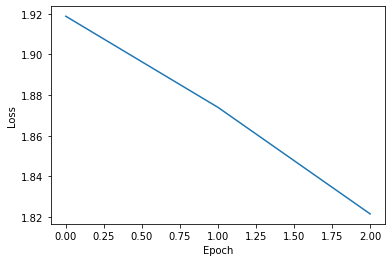

In [10]:
plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [18]:
df=pd.DataFrame(all_logits[2][:].detach().numpy())
lista=[]
for i in range(len(labels)):
  lista.append((all_logits[2][i].detach().numpy().argmax()))

df['Class']=pd.Series(lista)

In [19]:
df.head()

,0,1,2,3,4,5,6,Class
0,-1.879778,-2.011703,-2.026190,-1.993690,-1.809772,-1.989927,-1.929716,4
1,-1.886505,-2.010800,-2.016898,-1.991079,-1.814954,-1.984793,-1.933455,4
2,-1.887281,-2.004081,-2.018195,-1.987208,-1.828184,-1.982687,-1.928568,4
3,-1.872376,-2.014609,-2.039008,-1.998898,-1.798247,-1.992845,-1.928740,4
4,-1.888006,-2.001047,-2.020947,-1.989963,-1.829480,-1.973898,-1.932462,4
